In [1]:
%load_ext autoreload
%autoreload 2

# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os

import sys
sys.path.append('../../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../../Datos_Mod2/df_sin_out.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1568 non-null   int64   
 1   Attrition                1568 non-null   int64   
 2   BusinessTravel           1568 non-null   object  
 3   Department               1568 non-null   object  
 4   DistanceFromHome         1568 non-null   int64   
 5   Education                1568 non-null   category
 6   EducationField           1568 non-null   object  
 7   Gender                   1568 non-null   object  
 8   JobLevel                 1568 non-null   category
 9   JobRole                  1568 non-null   object  
 10  MaritalStatus            1568 non-null   object  
 11  MonthlyIncome            1568 non-null   float64 
 12  NumCompaniesWorked       1568 non-null   float64 
 13  PercentSalaryHike        1568 non-null   int64   
 14  StockOptionLe

In [4]:
lista_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # saco mis columnas numéricas

if 'Attrition' in lista_num:
    lista_num.remove('Attrition')

In [5]:
lista_num

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [6]:
df_estandar = f.escalar_columnas(df, lista_num) # aqui meto las estandarizaciones a mis columnas numericas

In [7]:
df_estandar.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsWithCurrManager_norm,Age_stand,DistanceFromHome_stand,MonthlyIncome_stand,NumCompaniesWorked_stand,PercentSalaryHike_stand,TotalWorkingYears_stand,YearsAtCompany_stand,YearsSinceLastPromotion_stand,YearsWithCurrManager_stand
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0.000000,1.552622,-0.385682,1.412573,-0.675498,-1.153147,-1.324089,-0.986171,-0.682940,-1.149483
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0.008419,-0.646575,0.107789,-0.487056,-1.075341,2.144864,-0.675407,-0.323866,-0.369460,-0.029987
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0.001373,-0.536615,0.971364,2.734462,-0.675498,-0.053810,-0.805143,-0.323866,-0.682940,-0.309861
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,0.005312,0.123144,-0.879153,0.392217,0.124186,-1.153147,0.232748,0.172862,1.511426,0.249888
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0.014964,-0.536615,0.107789,-0.880091,0.524028,-0.878313,-0.286198,-0.158290,-0.682940,-0.029987


In [8]:
df_estandar.describe()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,YearsWithCurrManager_norm,Age_stand,DistanceFromHome_stand,MonthlyIncome_stand,NumCompaniesWorked_stand,PercentSalaryHike_stand,TotalWorkingYears_stand,YearsAtCompany_stand,YearsSinceLastPromotion_stand,YearsWithCurrManager_stand
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03
mean,36.880102,0.160714,9.126276,731.996128,2.689413,15.195791,11.205995,6.955995,2.178571,4.107143,...,0.008448,1.200853e-16,4.191658e-17,6.344132e-17,-1.472745e-17,3.625218e-17,1.019593e-16,-2.662269e-17,1.359457e-17,1.008264e-16
std,9.097131,0.367384,8.108431,531.194449,2.501785,3.639717,7.710396,6.041442,3.191005,3.574175,...,0.010087,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00
min,18.000000,0.000000,1.000000,114.017000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.076053e+00,-1.002521e+00,-1.163748e+00,-1.075341e+00,-1.153147e+00,-1.453826e+00,-1.151747e+00,-6.829404e-01,-1.149483e+00
25%,30.000000,0.000000,2.000000,327.135000,1.000000,12.000000,6.000000,3.000000,0.000000,2.000000,...,0.001638,-7.565349e-01,-8.791527e-01,-7.624144e-01,-6.754985e-01,-8.783130e-01,-6.754071e-01,-6.550186e-01,-6.829404e-01,-5.897347e-01
50%,36.000000,0.000000,7.000000,553.474000,2.000000,14.000000,10.000000,5.000000,1.000000,3.000000,...,0.005180,-9.677588e-02,-2.623139e-01,-3.361840e-01,-2.756564e-01,-3.286443e-01,-1.564614e-01,-3.238662e-01,-3.694596e-01,-3.098606e-01
75%,43.000000,0.000000,14.000000,940.979250,4.000000,18.000000,15.000000,9.000000,3.000000,7.000000,...,0.011559,6.729430e-01,6.012605e-01,3.935466e-01,5.240277e-01,7.706929e-01,4.922206e-01,3.384386e-01,2.575021e-01,8.096357e-01
max,60.000000,1.000000,29.000000,2259.887000,9.000000,25.000000,40.000000,40.000000,15.000000,17.000000,...,0.085076,2.542260e+00,2.451777e+00,2.877248e+00,2.523238e+00,2.694533e+00,3.735631e+00,5.471301e+00,4.019272e+00,3.608377e+00


In [9]:
df_estandar.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_min

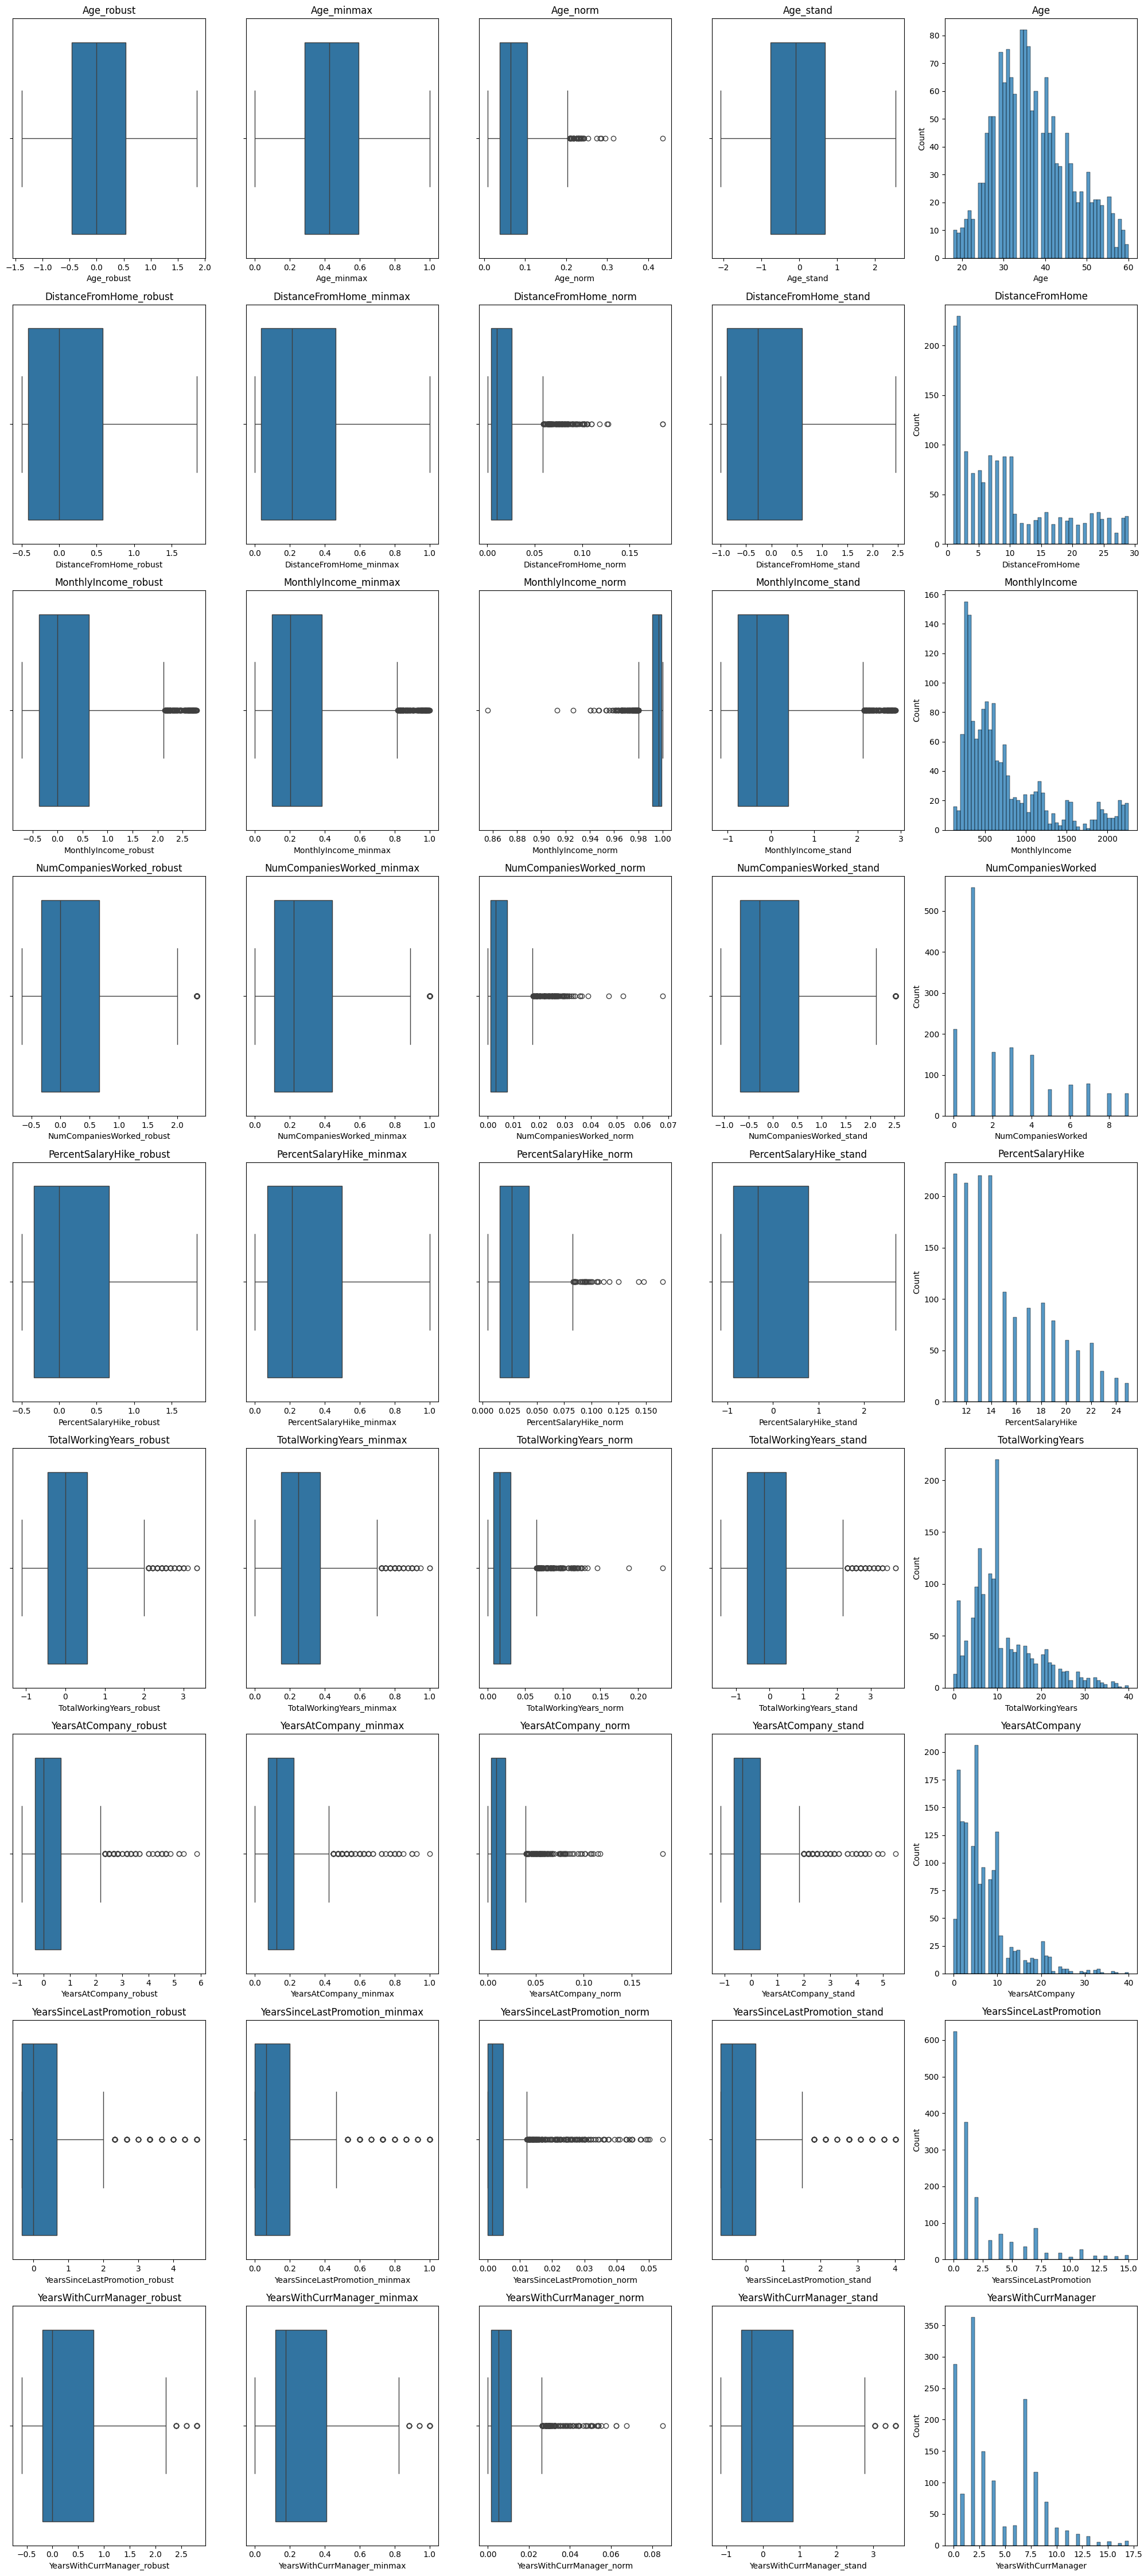

In [10]:
f.visualizar_escalados_completos(df_estandar, lista_num)

## Observaciones:
- En la variable edad se podría decir que sigue una distribución casi normal. Esto se traduce a la ausencia de outliers. A la vez sigue una representación lógica de la realidad, personas por encima de los 18 años (legalmente pueden trabajar) y un tope máximo de 60 años para trabajar. Esta suele ser una edad para el retiro, sin embargo no tengo la certeza de que en este país ese sea el caso.
- DistanceFromHome, muchos empleados viven cerca del trabajo que es algo positivo ya que no tienen la necesidad de movilizarse por grandes distancias para llegar a su lugar de trabajo. Además puede contribuir a menos personas usando métodos de transporte y que estos no se vean muy congestionados. Sin embargo, vemos que tenemos una distancia máxima de 30 km. Se puede observar una menor cantidad de personas que se encuentran a un radio mayor a los 10 kms, estos no representan la gran mayoría pero son casos que se pueden presentar.
- Existe un gran pico de personas que tienen salarios bajos, entre los 300 y 900 euros mensuales. Esto tiene mucho sentido considerando que más del 70% de los empleados aquí es encuentran en un nivel 1 y 2. En esta sí existen algunos outliers ya que la ganancia mensual puede elevarse por encima de los 2000 euros al mes, pero esto resalta negativamente en esta distribución. Además de que la mediana está rodando los 500 € mientras que la media está más alta(700) debido a estos outliers.
- NumCompaniesWorked, hay mayor presencia en los dos primeros grupos. Lo que dice que este resulta ser el primer o segundo trabajo.
- PercentySalaryHike, tiene mayor presencia en los primeros grupos. Esto nos dice que en cuanto al porcentaje de aumento, resaltan los valores mas bajos.
- TotalWorkingYears, se puede ver que va en aumento hasta los 10 años en la cantidad de empleados presentes. A partir de allí hay una amplia disminución de presencia. Esto pudiera sugerir que apostan por una empleabilidad con cierta juventud y que se va abriendo pasos en el mercado laboral.
- YearsatCompany, va un poco relacionado con la columna anterior. Aquí hay gran presencia de empleados hasta los 6-7 años de presencia. A partir de este punto es que empieza a disminuir la presencia de empleados.
- YearsSinceLastPromotion tiene valores altos hasta los 2 años y medio. Esto pudiera señalar que normalmente este es un punto de inflexión, por lo que suelen darse promociones después de este período.
- En cuanto a YearsWithCurrentManager aquí e ve una influencia similar a lo anterior, donde se ven valores altos en los primeros años debajo del mismo manager. A partir de este momento se ven bajadas. 

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_min

In [12]:
columnas_seleccionadas = ['Age_robust', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome_robust',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome_robust', 'NumCompaniesWorked_robust',
       'PercentSalaryHike_robust', 'StockOptionLevel', 'TotalWorkingYears_robust',
       'TrainingTimesLastYear', 'YearsAtCompany_robust', 'YearsSinceLastPromotion_robust',
       'YearsWithCurrManager_robust', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

In [13]:
df_estandar_filtrado = df_estandar[columnas_seleccionadas]

df_estandar_filtrado.head()


,Age_robust,Attrition,BusinessTravel,Department,DistanceFromHome_robust,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears_robust,TrainingTimesLastYear,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.153846,0,Travel_Rarely,Sales,-0.083333,2,Life Sciences,Female,1,Healthcare Representative,...,-1.000000,6,-0.666667,-0.333333,-0.6,3.0,4.0,2.0,3,3
1,-0.384615,1,Travel_Frequently,Research & Development,0.250000,1,Life Sciences,Female,1,Research Scientist,...,-0.444444,3,0.000000,0.000000,0.2,3.0,2.0,4.0,2,4
2,-0.307692,0,Travel_Frequently,Research & Development,0.833333,4,Other,Male,4,Sales Executive,...,-0.555556,2,0.000000,-0.333333,0.0,2.0,2.0,1.0,3,3
3,0.153846,0,Non-Travel,Research & Development,-0.416667,5,Life Sciences,Male,3,Human Resources,...,0.333333,5,0.500000,2.000000,0.4,4.0,4.0,3.0,2,3
4,-0.307692,0,Travel_Rarely,Research & Development,0.250000,1,Medical,Male,1,Sales Executive,...,-0.111111,2,0.166667,-0.333333,0.2,4.0,1.0,3.0,3,3


In [14]:
df_estandar_filtrado.to_pickle('../../Datos_Mod2/df_estandarizado.pkl')